In [1]:
import TIVlib as tiv
import numpy as np

In [2]:
from essentia.standard import MonoLoader, Windowing, Spectrum, SpectralPeaks, FrameGenerator, HPCP

def file_to_hpcp(filename):
    audio = MonoLoader(filename=filename)()
    windowing = Windowing(type='blackmanharris62')
    spectrum = Spectrum()
    spectral_peaks = SpectralPeaks(orderBy='magnitude',
                                    magnitudeThreshold=0.001,
                                    maxPeaks=20,
                                    minFrequency=20,
                                    maxFrequency=8000)
    hpcp = HPCP(maxFrequency=8000)#,
                #normalized='unitSum') #VERIFICAR QUE ISTO E O Q FAZ SENTIDO FAZER

    spec_group = []
    hpcp_group = []


    for frame in FrameGenerator(audio,frameSize=1024,hopSize=512):
        windowed = windowing(frame)
        fft = spectrum(windowed)
        frequencies, magnitudes = spectral_peaks(fft)
        final_hpcp = hpcp(frequencies, magnitudes)
  
        spec_group.append(fft)
        hpcp_group.append(final_hpcp)
    
    mean_hpcp = np.mean(np.array(hpcp_group).T, axis = 1)
    return mean_hpcp


In [3]:
import librosa

def file_to_chroma(filename):
    audio = librosa.core.load(filename)
    chromagram = librosa.feature.chroma_stft(audio)
    print (chromagram)
    mean_chromagram = np.mean(chromagram,axis = 0)
    return mean_chromagram
    

In [4]:
#Reference: CMaj chord
c_maj = "./audio_files/149282__strever953__rhythmguitar-cmaj-p105.wav"
#Consonant chords: GMaj, Amin
g_maj = "./audio_files/109999__keider__gmaj-5th-position.wav"
a_min = "./audio_files/8455__speedy__amin-full.wav"
#Dissonant chords: C#Maj, D#min
c_sharp_maj = "./audio_files/47848__godlesswonder__c-sharp-maj.wav"
d_sharp_min = "./audio_files/47862__godlesswonder__d-sharp-min.wav"

#Calculate the HPCP for each of the chords
c_maj_hpcp = file_to_hpcp(c_maj)
g_maj_hpcp = file_to_hpcp(g_maj)
a_min_hpcp = file_to_hpcp(a_min)
c_sharp_maj_hpcp = file_to_hpcp(c_sharp_maj)
d_sharp_min_hpcp = file_to_hpcp(d_sharp_min)

#Calculate the TIV for each HPCP
c_maj_tiv = tiv.TIV.from_pcp(c_maj_hpcp)
g_maj_tiv = tiv.TIV.from_pcp(g_maj_hpcp)
a_min_tiv = tiv.TIV.from_pcp(a_min_hpcp)
c_sharp_maj_tiv = tiv.TIV.from_pcp(c_sharp_maj_hpcp)
d_sharp_min_tiv = tiv.TIV.from_pcp(d_sharp_min_hpcp)


In [5]:
#Examples on the magnitude and phase features
print("CMaj TIV.mag")
print(tiv.mag.mags(c_maj_tiv))
print("TIV weights")
print(tiv.TIV.weights)
print("CMaj TIV.phases")
print(tiv.phases(c_maj_tiv))
print("CMaj diatonicity")
print(tiv.mag.diatonicity(c_maj_tiv))
print("CMaj wholetoneness")
print(tiv.mag.wholetoneness(c_maj_tiv))
print("CMaj chromaticity")
print(tiv.mag.chromaticity(c_maj_tiv))

CMaj TIV.mag
[ 2.51097787 19.42804488 12.99377869 19.86995594  2.80191612 25.44873447]
TIV weights
[3, 8, 11.5, 15, 14.5, 7.5]
CMaj TIV.phases
[-1.06960811 -1.74496402  2.41494035  2.53380813  2.18811765  0.44516799]
CMaj diatonicity
0.19323559469092536
CMaj wholetoneness
3.393164596374322
CMaj chromaticity
0.8369926229687393


In [6]:
#Example on extracting keys
#Values are not the same as before
print("CMaj from Temperley profiles and the Shaath")
print(tiv.key(c_maj_tiv, mode='temperley'))
print(tiv.key(c_maj_tiv, mode='shaath'))
print("GMaj from Temperley profiles and the Shaath")
print(tiv.key(g_maj_tiv, mode='temperley'))
print(tiv.key(g_maj_tiv, mode='shaath'))
print("Amin from Temperley profiles and the Shaath")
print(tiv.key(a_min_tiv, mode='temperley'))
print(tiv.key(a_min_tiv, mode='shaath'))
print("C#Maj from Temperley profiles and the Shaath")
print(tiv.key(c_sharp_maj_tiv, mode='temperley'))
print(tiv.key(c_sharp_maj_tiv, mode='shaath'))
print("D#min from Temperley profiles and the Shaath")
print(tiv.key(d_sharp_min_tiv, mode='temperley'))
print(tiv.key(d_sharp_min_tiv, mode='shaath'))

CMaj from Temperley profiles and the Shaath
('d', 'min')
('f', 'min')
GMaj from Temperley profiles and the Shaath
('Gb', 'maj')
('bb', 'min')
Amin from Temperley profiles and the Shaath
('f', 'min')
('Db', 'maj')
C#Maj from Temperley profiles and the Shaath
('ab', 'min')
('a', 'min')
D#min from Temperley profiles and the Shaath
('gb', 'min')
('Db', 'maj')


In [7]:
#Example on combining sounds and evaluate its dissonance
combined_GM = tiv.combine(c_maj_tiv, g_maj_tiv)
combined_Am = tiv.combine(c_maj_tiv, a_min_tiv)
combined_CSM = tiv.combine(c_maj_tiv, c_sharp_maj_tiv)
combined_DSm = tiv.combine(c_maj_tiv, d_sharp_min_tiv)

print("Dissonance CMaj + GMaj")
print(tiv.dissonance(combined_GM))
print("Dissonance CMaj + Amin")
print(tiv.dissonance(combined_Am))
print("Dissonance CMaj + C#Maj")
print(tiv.dissonance(combined_CSM))
print("Dissonance CMaj + D#min")
print(tiv.dissonance(combined_DSm))

Dissonance CMaj + GMaj
-2.186336790473715
Dissonance CMaj + Amin
0.35525852869787067
Dissonance CMaj + C#Maj
-0.6994315978154069
Dissonance CMaj + D#min
-1.5556376580556015


In [8]:
#Example on calculating the distances between sounds
print("Euclidean and cosine distance between CMaj and GMaj")
print(tiv.distances.euclidean(c_maj_tiv,g_maj_tiv))
print(tiv.distances.cosine(c_maj_tiv,g_maj_tiv))

print("Euclidean and cosine distance between CMaj and AMin")
print(tiv.distances.euclidean(c_maj_tiv,a_min_tiv))
print(tiv.distances.cosine(c_maj_tiv,a_min_tiv))

print("Euclidean and cosine distance between CMaj and C#Maj")
print(tiv.distances.euclidean(c_maj_tiv,c_sharp_maj_tiv))
print(tiv.distances.cosine(c_maj_tiv,c_sharp_maj_tiv))

print("Euclidean and cosine distance between CMaj and D#min")
print(tiv.distances.euclidean(c_maj_tiv,d_sharp_min_tiv))
print(tiv.distances.cosine(c_maj_tiv,d_sharp_min_tiv))


Euclidean and cosine distance between CMaj and GMaj
37.58242782699877
1.1081037140938734
Euclidean and cosine distance between CMaj and AMin
41.15099568198759
1.7776075271522596
Euclidean and cosine distance between CMaj and C#Maj
76.21828069615252
1.5583574258679054
Euclidean and cosine distance between CMaj and D#min
42.98918960008595
1.7741423831939982


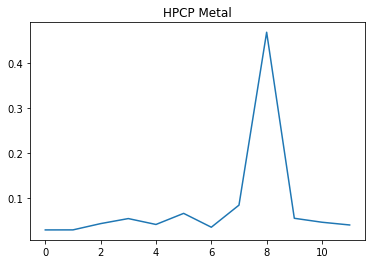

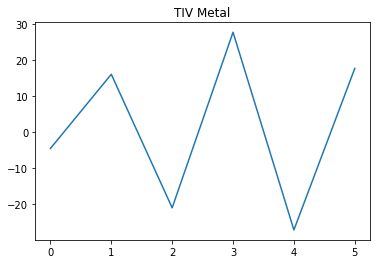

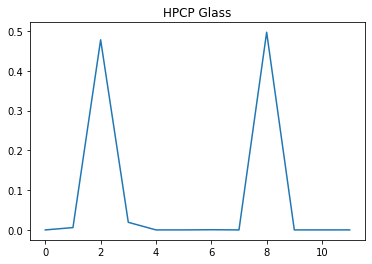

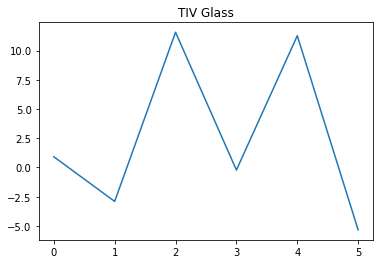

In [14]:
#Testing

%matplotlib inline
import matplotlib.pyplot as plt



metal = "./audio_files/metal.wav"
glass = "./audio_files/glass.wav"

metal_hpcp = file_to_hpcp(metal)
glass_hpcp = file_to_hpcp(glass)

metal_tiv = tiv.TIV.from_pcp(metal_hpcp)
glass_tiv = tiv.TIV.from_pcp(glass_hpcp)

plt.figure(1)
plt.title('HPCP Metal')
plt.plot(metal_hpcp/np.sum(metal_hpcp))
plt.show()

plt.figure(2)
plt.title('TIV Metal')
plt.plot(metal_tiv.vector)
plt.show()

plt.figure(2)
plt.title('HPCP Glass')
plt.plot(glass_hpcp/np.sum(glass_hpcp))
plt.show()

plt.figure(4)
plt.title('TIV Glass')
plt.plot(glass_tiv.vector)
plt.show()